# ANÁLISE DE VIABILIDADE DE PROJETO

Uma empresa de desenvolvimento de software pretende estimar se um determinado projeto será finalizado ou não com base em 2 dimensões:
 - Horas estimadas do projeto
 - Preço sugerido
 
Com base nos projetos anteriores, pretende-se estimar se um novo projeto será finalizado ou não. Assim, pode-se reajustar o preço do projeto ou reajustar as horas dedicadas.


| unfinished | expected_hours | price |
| --- | --- | --- |
| 1 | 26 | 192|

 - unfinished: indica se foi finalizado ou não. (0 -> Finalizado / 1 -> Não-Finalizado)
 - expected_hours: indica as horas estimadas
 - price: indica o preço cobrado


Os dados para treino e testes do modelo se encontram no arquivo CSV: projects.csv


Seu objetivo é criar um programa que possa ler dados do arquivo, treinar e aprender com base nos registros para que o programa seja capaz de analisar novos valores digitados pelo usuário

In [257]:
#instalando pandas caso necessário
%pip install pandas

In [258]:
#importando base de dados
import pandas as pd

df = pd.read_csv('projects.csv')

display(df)

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170
...,...,...,...
2152,0,80,7518
2153,1,52,1332
2154,0,40,473
2155,0,75,5324


In [259]:
#criando nova tabela chamada finished, invertendo os valores de unfinished e dropando unfinished
aux = {0:1, 1:0}

finished = df['unfinished'].map(aux)
df['finished'] = finished

df.drop(columns=['unfinished'], inplace=True)

display(df)

,expected_hours,price,finished
0,26,192,0
1,88,9015,0
2,89,2577,0
3,42,275,0
4,39,170,0
...,...,...,...
2152,80,7518,1
2153,52,1332,0
2154,40,473,1
2155,75,5324,1


In [260]:
#renomeando para portugues as colunas
df.rename({
    'expected_hours':'horas_estimadas',
    'price':'preco',
    'finished':'finalizado'
}, axis=1, inplace=True)

display(df)

,horas_estimadas,preco,finalizado
0,26,192,0
1,88,9015,0
2,89,2577,0
3,42,275,0
4,39,170,0
...,...,...,...
2152,80,7518,1
2153,52,1332,0
2154,40,473,1
2155,75,5324,1


In [261]:
#instalando bibliotecas gráficas (caso necessário)
%pip install seaborn
%pip install matplotlib
%pip install plotly

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [262]:
#importando grafico com seaborn e matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

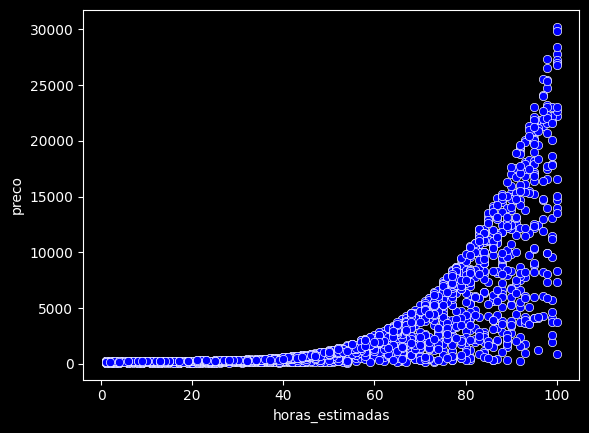

In [263]:
#Imprimindo gráfico
ax = sns.scatterplot(data=df, x='horas_estimadas', y='preco', color='b')
plt.show()

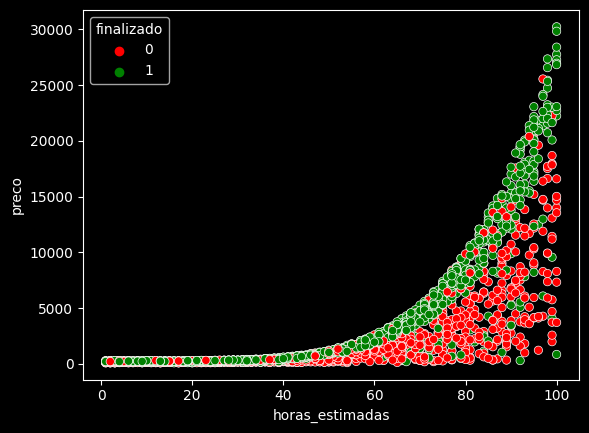

In [264]:
#Imprimindo o mesmo gráfico mas agora com filtro de finalizado e não finalizado
palette ={1: "g", 0: "r"}#mapa com as cores de cada ponto
ax = sns.scatterplot(data=df, x='horas_estimadas', y='preco', hue='finalizado', palette=palette)

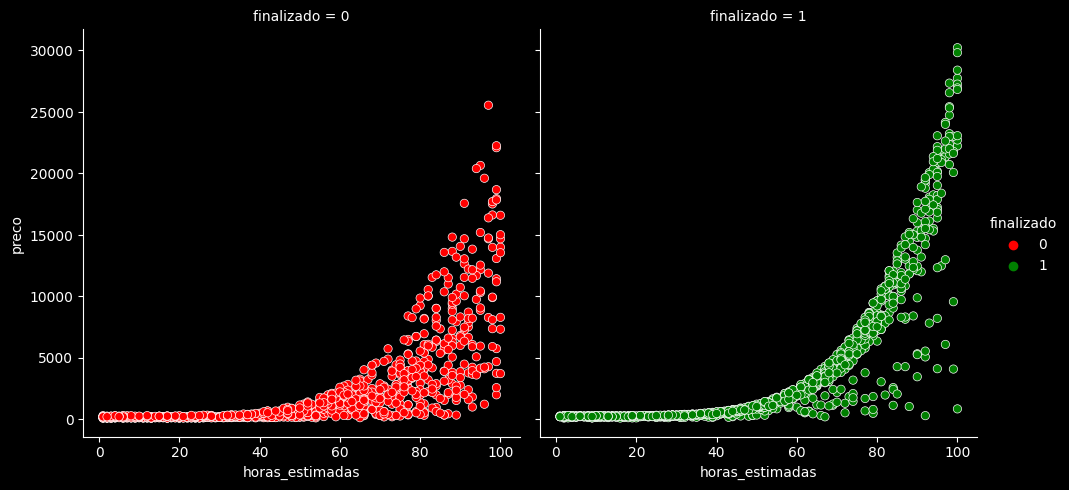

In [265]:
#Imprimindo o mesmo gráfico acima mas agora separado
palette ={1: "g", 0: "r"}#mapa com as cores de cada ponto
ax = sns.relplot(data=df, x='horas_estimadas', y='preco', hue='finalizado', col='finalizado', palette=palette)

In [266]:
#Refazendo os gráficos acimas mas agora com o plotly
#Importando a biblioteca plotly

import plotly.express as px

In [267]:
#Imprimindo o grafico de dispersão sem filtro
fig = px.scatter(df, x='horas_estimadas', y='preco')
fig.show()


In [268]:
#Imprimindo o grafico de dispersão com filtro de finalizado e não finalizado
df["finalizado"] = df["finalizado"].astype(str)
fig = px.scatter(df, x='horas_estimadas', y='preco', color='finalizado', color_discrete_sequence=['red','green'])
fig.show()

In [269]:
#Imprimindo o mesmo gráfico acima mas agora separado

fig = px.scatter(df, x='horas_estimadas', y='preco', color='finalizado', facet_col='finalizado', color_discrete_sequence=['red', 'blue'])
fig.show()

## INTELIGÊNCIA ARTIFICIAL

Nessa parte será analizado os dados para no final poder prever se um projeto será finalizado ou não

In [270]:
#Divisão de X e Y

y = df['finalizado']
x = df[['horas_estimadas', 'preco']]

x = x.values

In [271]:
#Importando as IA
from sklearn.ensemble import RandomForestClassifier

In [272]:
#Dividindo a base de treino e teste
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [273]:
#Criando o modelo da IA
randomForest_model = RandomForestClassifier()

In [274]:
#Treinando a IA
randomForest_model.fit(x_train, y_train)

RandomForestClassifier()

In [275]:
#Testando a IA
predict_randomForest = randomForest_model.predict(x_test)

In [276]:
#Avaliando a precisão da IA
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, predict_randomForest)

print(f'{score:,.2%}')


77.22%


In [277]:
#Verificando as previsões da IA
from IPython.display import display, HTML

df_aux = pd.DataFrame()
df_aux['Resposta Correta'] = y_test
df_aux['Previsão IA'] = predict_randomForest

display(df_aux) #dados simplificados
# display(HTML(df_aux.to_html())) #dados completos

,Resposta Correta,Previsão IA
1989,1,1
1553,1,1
786,0,0
1865,1,1
1539,1,1
...,...,...
1210,1,1
145,0,0
113,0,0
1191,1,1


In [278]:
#Efetuando previsões para o usuário



horas_estimadas = int(input('Entre com as horas estimadas do projeto: '))
preco = int(input('Entre com o preço estimado do projeto: '))

predict = randomForest_model.predict([[horas_estimadas, preco]])

predict = 'SIM' if predict != ['0'] else 'NÃO'

print(f'\nHoras estimadas: {horas_estimadas}h')
print(f'Preço do projeto: R${preco},00')

print(f'\nRESULTADO: Este projeto {predict} será finalizado')
print(f'Confiabilidade da IA: {score:,.2%}')


Horas estimadas: 80h
Preço do projeto: R$1000,00

RESULTADO: Este projeto NÃO será finalizado
Confiabilidade da IA: 77.22%
